<a href="https://colab.research.google.com/github/bereacs/l01-greedy-tsp-FlashEb/blob/master/L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: Elijah Babayemi

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

My initial design plan was to follow the given pseudocode in the google doc closely and fill out all the methods that needed fixing. I was expecting to implement each function step by step in the class structure and display the results as a visual and a output string. During my implementation, my design changed when I realize I needed to add tsp-48.txt as an input file. I also had to debug issues with node numbering and KeyErrors until the graph coordinates aligned with the route IDs. I spent about 11 hours on this assignment.

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

I worked on this lab by myself.

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

A significant challenge was debugging KeyErrors that arose when the greedy algorithm tried to look up a node that didn’t exist in the coordinate dictionary.

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

FIXME

**TESTING**: Describe how you tested this work.

FIXME

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

FIXME

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

FIXME

## Import Libraries

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [46]:
tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
print(tspdata)

6
1 5 
3 7 
5 11 
3 5 
5 7 
7 9 



## TSP Class

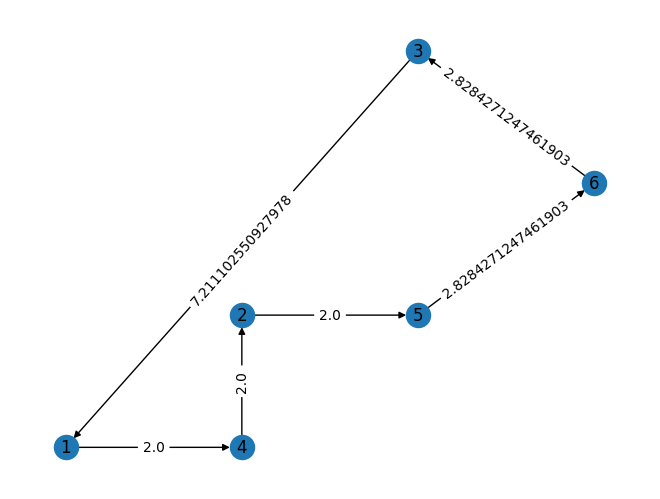

"""
7
1 5
3 5
3 7
5 7
7 9
5 11
1 5
"""


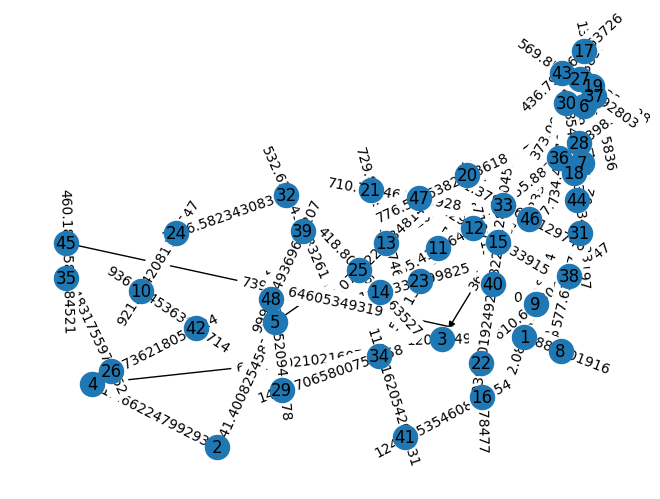

"""
51
6734 1453
401 841
2233 10
3082 1644
7608 4458
5530 1424
6734 1453
6734 1453
6898 1885
7392 2244
7545 2801
7509 3239
7462 3590
7573 3716
7541 3981
7248 3779
7352 4506
7555 4819
7732 4723
7762 4595
7280 4899
7611 5184
6807 2993
6426 3173
6347 2683
5989 2873
5468 2606
5199 2182
4612 2035
4307 2322
4706 2674
4483 3369
5185 3258
5900 3561
6271 2135
6101 1110
6107 669
4985 140
4608 1198
3177 756
3023 1942
3484 2829
3245 3305
1633 2809
1112 2049
1916 1569
675 1006
23 2216
10 2676
7265 1268
6734 1453
"""


In [47]:
"""

Given certain input, it uses the greedy algorithm to plot a graph and output a file of the solution path
"""

class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing.
            Creates a graph for the traveling salesperon problem using the greedy algorithm
        """

        self.dimension = None
        self.nodeData = []
        self.graph = nx.DiGraph()
        self.coords = {}
        self.places = []
        self.route = []

    def extractData(self, inputFile=""):
        """
        Itterate through the input file and append each coordinate into the node list.
        Keyword Arguments:
            inputFile {str} -- a string for the file name (default: {""})
        """
         # Split input lines
        lines = inputFile.strip().split("\n")

        # First line = number of vertices
        self.dimension = int(lines[0])

        # Remaining lines = coordinates
        for i in range(1, len(lines)):
            x, y = map(float, lines[i].split())
            self.nodeData.append((i, x, y))

    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key """
        # Fill dictionary with key = node ID, value = (x, y)
        for node, x, y in self.nodeData:
            self.coords[node] = (x, y)

    def calculateDistance(self, a, b):
        """calculates & returns the distance between points a and b
        Arguments:
            a {[tuple]} -- tuple of numbers for the x and y coordinate of a node
            b {[tuple]} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            [float] -- the distance between the two points using the distance formula
        """
        # The distance formula
        return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

    def getRoute(self, current, visits=[], nVisits=[], needList=True):
        """Makes a list of the nodes to be visited, in order, according to the greedy alogorithm for the TSP
        Arguments:
            current {int} -- the node to start at, not a list index
        Keyword Arguments:
            visits {list} -- list of places already visited (default: {[]})
            nVisits {list} -- list of places not visited (default: {[]})
            needList {bool} -- boolean deciding if the list of places not visited needs to be filled (default: {True})
        """

        if needList:
          # All the unvisited nodes
            nVisits = self.listPlaces()
            needList = False

        # Added current node to the visited list
        visits.append(current)
        nVisits = self.cleanUpList(visits, nVisits)

        # Base case, if no unvisited nodes remain, return the full tour
        if len(nVisits) == 0:
            return visits

        # Track the nearest neighbor
        shortest = float('inf')
        nextNode = None

        # Finds the nearest unvisited neighbor by distance
        for node in nVisits:
            distance = self.calculateDistance(self.coords[current], self.coords[node])
            if distance < shortest:
                shortest = distance
                nextNode = node

        # Go to the next nearest node
        return self.getRoute(nextNode, visits, nVisits, needList)

    def beGreedy(self, start):
        """ puts together the greedy algorithm. Gets the route order and adds the starting place to the end of the route
        Arguments:
            start -- the starting node for the greedy algorithm
        """

        # Get greedy route starting at 'start'
        self.route = self.getRoute(start)

        # Append the starting node at the end to complete the cycle
        self.route.append(start)

    def listPlaces(self):
        """makes a list of all the nodes/places from the dictionary
        Returns:
            [list] -- list of all the nodes/places
        """

        # Return dictionary keys as a list of node IDs
        return list(self.coords.keys())

    def cleanUpList(self, visited, notVisited):
        """removes items in visited from notVisited
        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited
        """

        for item in visited:
            if item in notVisited:
                notVisited.remove(item)
        return notVisited

    def addNodes(self):
        """ adds nodes to the networkx graph
        """

        for everything in self.nodeData:
            node = everything[0]
            self.graph.add_node(node, pos=self.coords[node])

    def addEdges(self):
        """Adds graphs to the networkx graph
        """

        x = 0
        while x < len(self.route)-1:
            self.graph.add_edge(self.route[x], self.route[x+1],
                                weight=self.calculateDistance(self.coords[self.route[x]], self.coords[self.route[x+1]]))
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph
        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        # draw nodes in their coordinates
        nx.draw(self.graph, coords)
        nx.draw_networkx_labels(self.graph, coords)
        # draw edges with their weights
        nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels)
        plt.show()




def main():
    tsp = TSP()

    tsp.extractData(tspdata)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy(1)
    tsp.addEdges()
    tsp.showGraph()

    # Output the tour as a triple-quoted string in the required format

    # Build the output string in the required format
    output_lines = [f'{len(tsp.route)}']
    for node in tsp.route:
        x, y = tsp.coords[node] # Get the coordinates for the node
        output_lines.append(f"{int(x)} {int(y)}")
    output_str = '"""\n' + '\n'.join(output_lines) + '\n"""'
    print(output_str)

    tsp.extractData(tspdata2)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy(1)
    tsp.addEdges()
    tsp.showGraph()

    # Output the tour as a triple-quoted string in the required format

    # Build the output string in the required format
    output_lines = [f'{len(tsp.route)}']
    for node in tsp.route:
        x, y = tsp.coords[node] # Get the coordinates for the node
        output_lines.append(f"{int(x)} {int(y)}")
    output_str = '"""\n' + '\n'.join(output_lines) + '\n"""'
    print(output_str)



main()